<a href="https://colab.research.google.com/github/hariiprd/yolov8-model/blob/main/YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Unzip ds file
import zipfile
with zipfile.ZipFile("ds.zip","r") as zip_ref:
    zip_ref.extractall("datasets")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# install YOLO v8
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.2/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

### **Test predict image**

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='/content/test.jpg' save=True

In [ ]:
Image(filename='/content/runs/detect/predict/test.jpg', height=640)

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="T5p8G1ctPgP6YES1FOMI")
project = rf.workspace("hari-prediansyah-sg0ra").project("person-detection-64fvc")
dataset = project.version(10).download("yolov8")

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model="best (1).pt" data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data="/content/datasets/v1/data.yaml" epochs=50 imgsz=640 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/datasets/v1/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simpl

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png       train_batch720.jpg
confusion_matrix.png				    results.csv       train_batch721.jpg
events.out.tfevents.1701922349.af0b031e31f0.1811.0  results.png       train_batch722.jpg
F1_curve.png					    train_batch0.jpg  val_batch0_labels.jpg
P_curve.png					    train_batch1.jpg  val_batch0_pred.jpg
PR_curve.png					    train_batch2.jpg  weights


/content


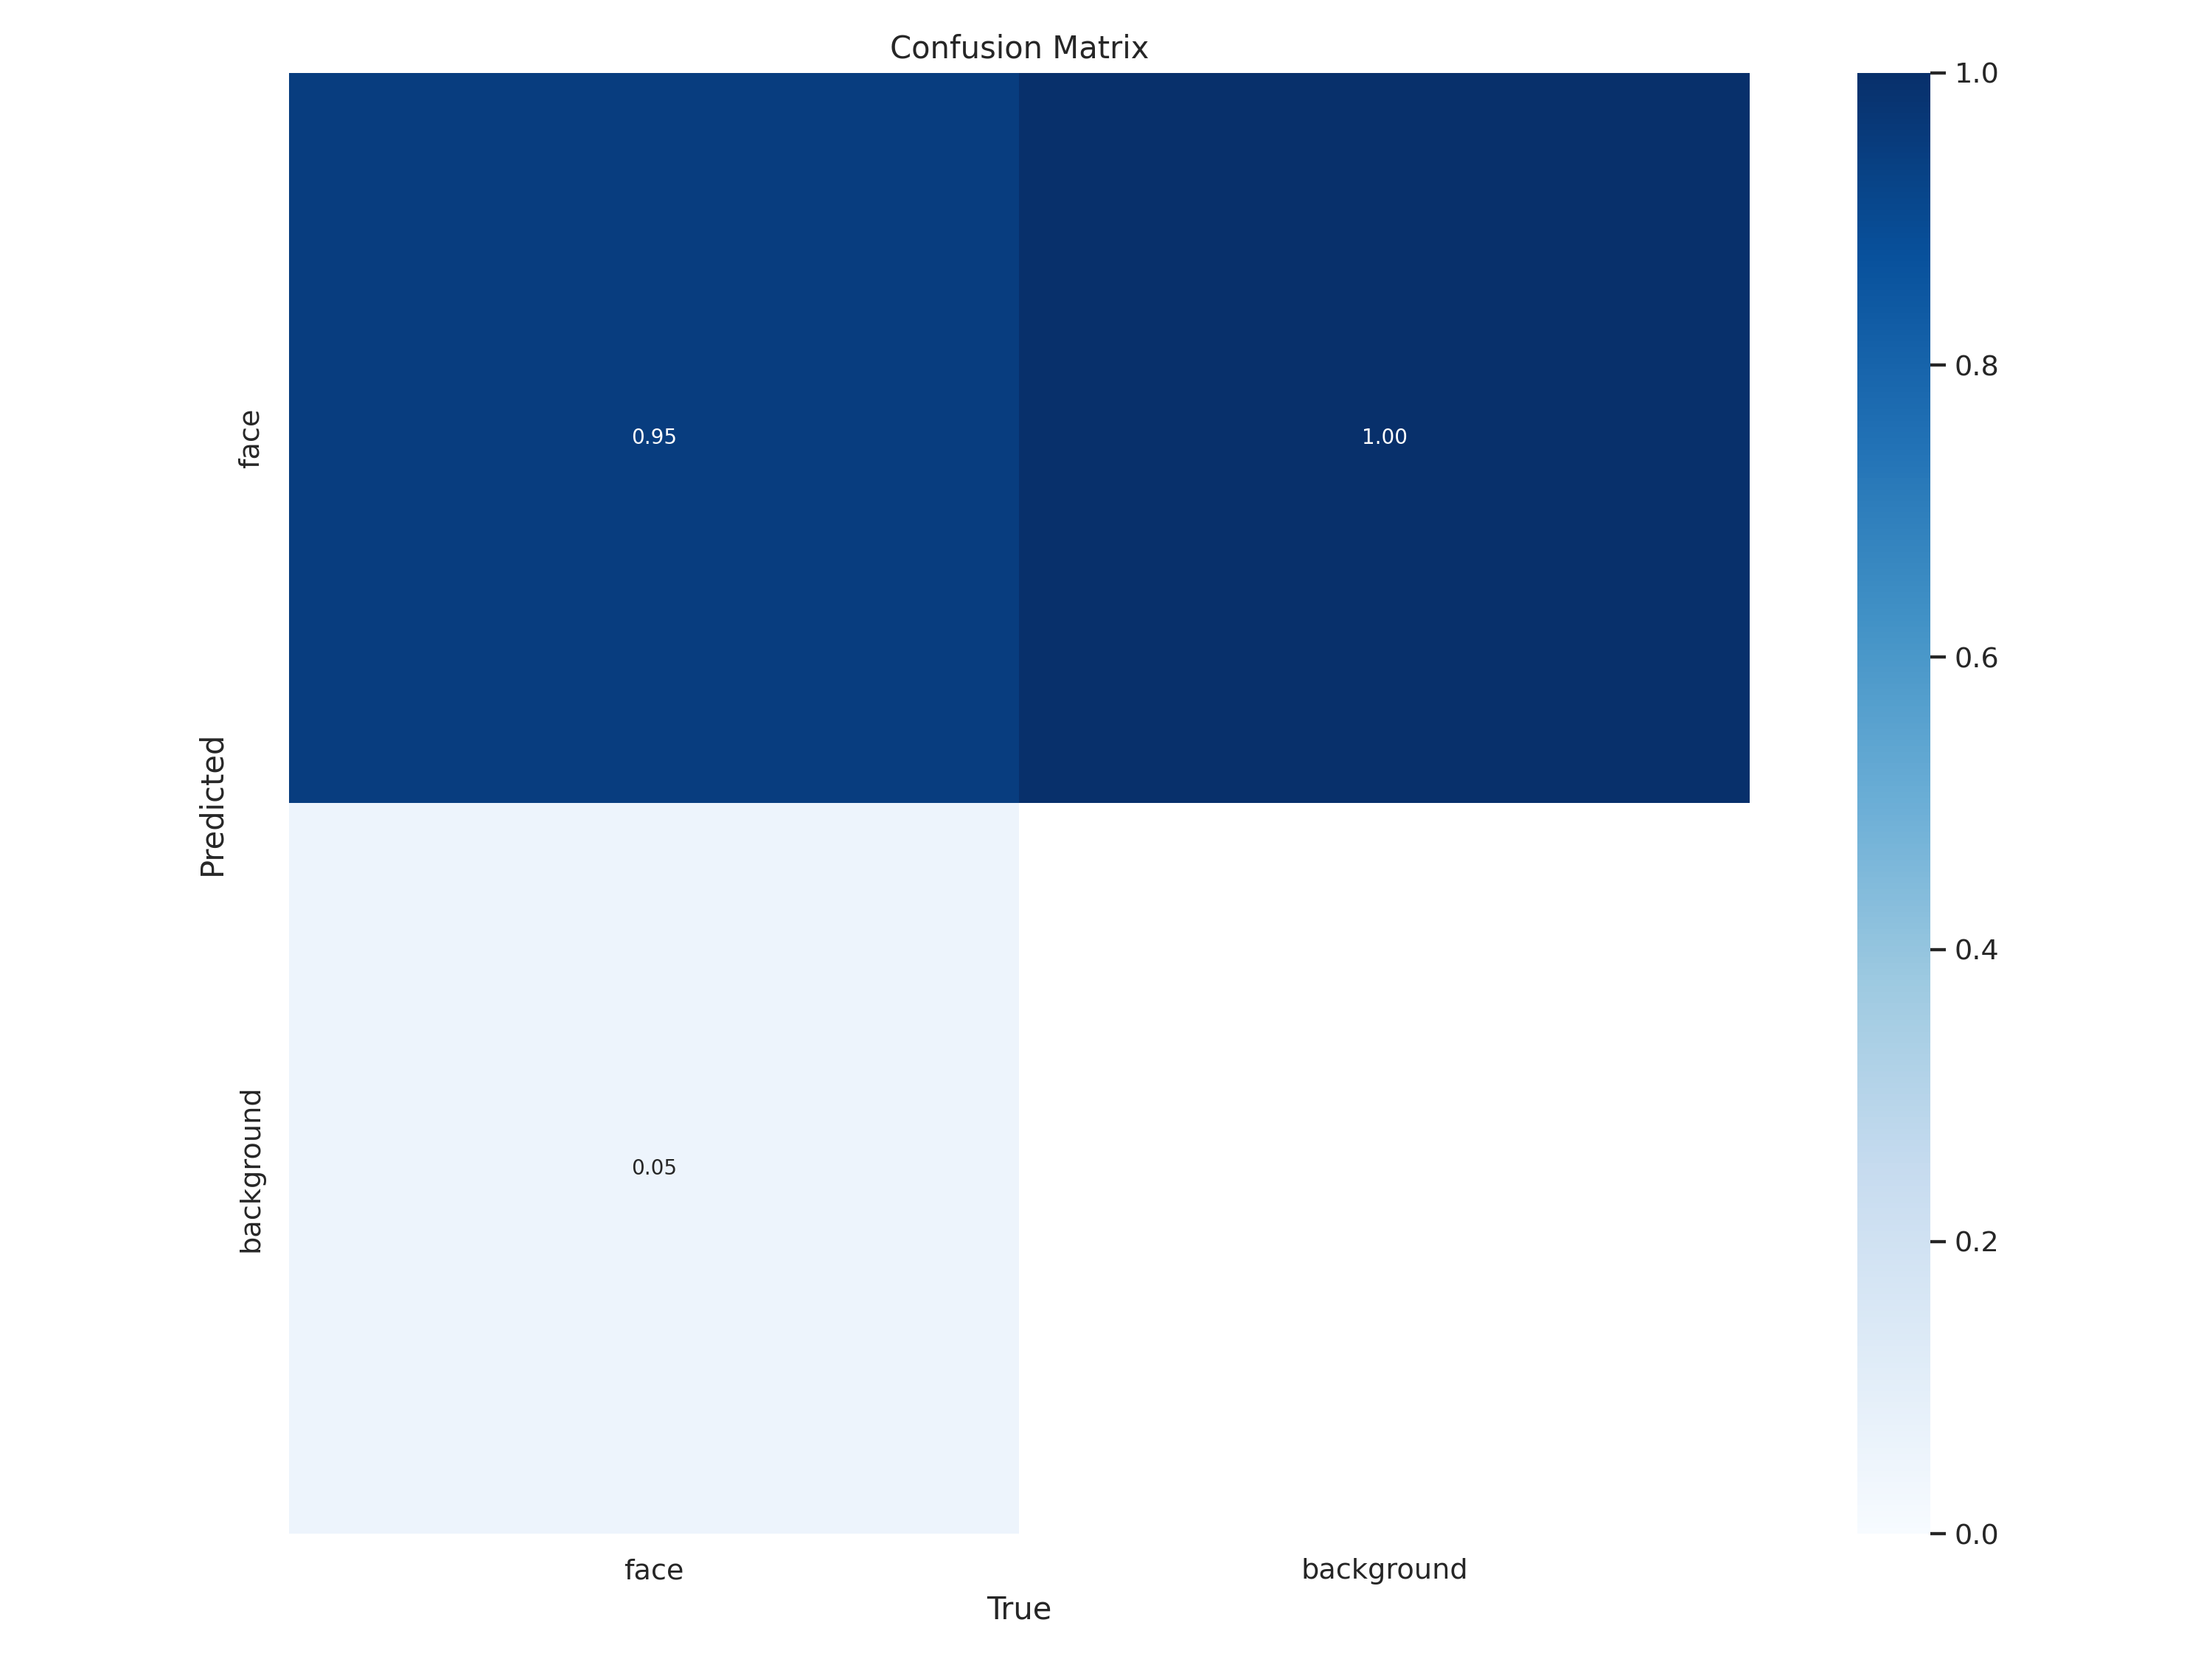

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


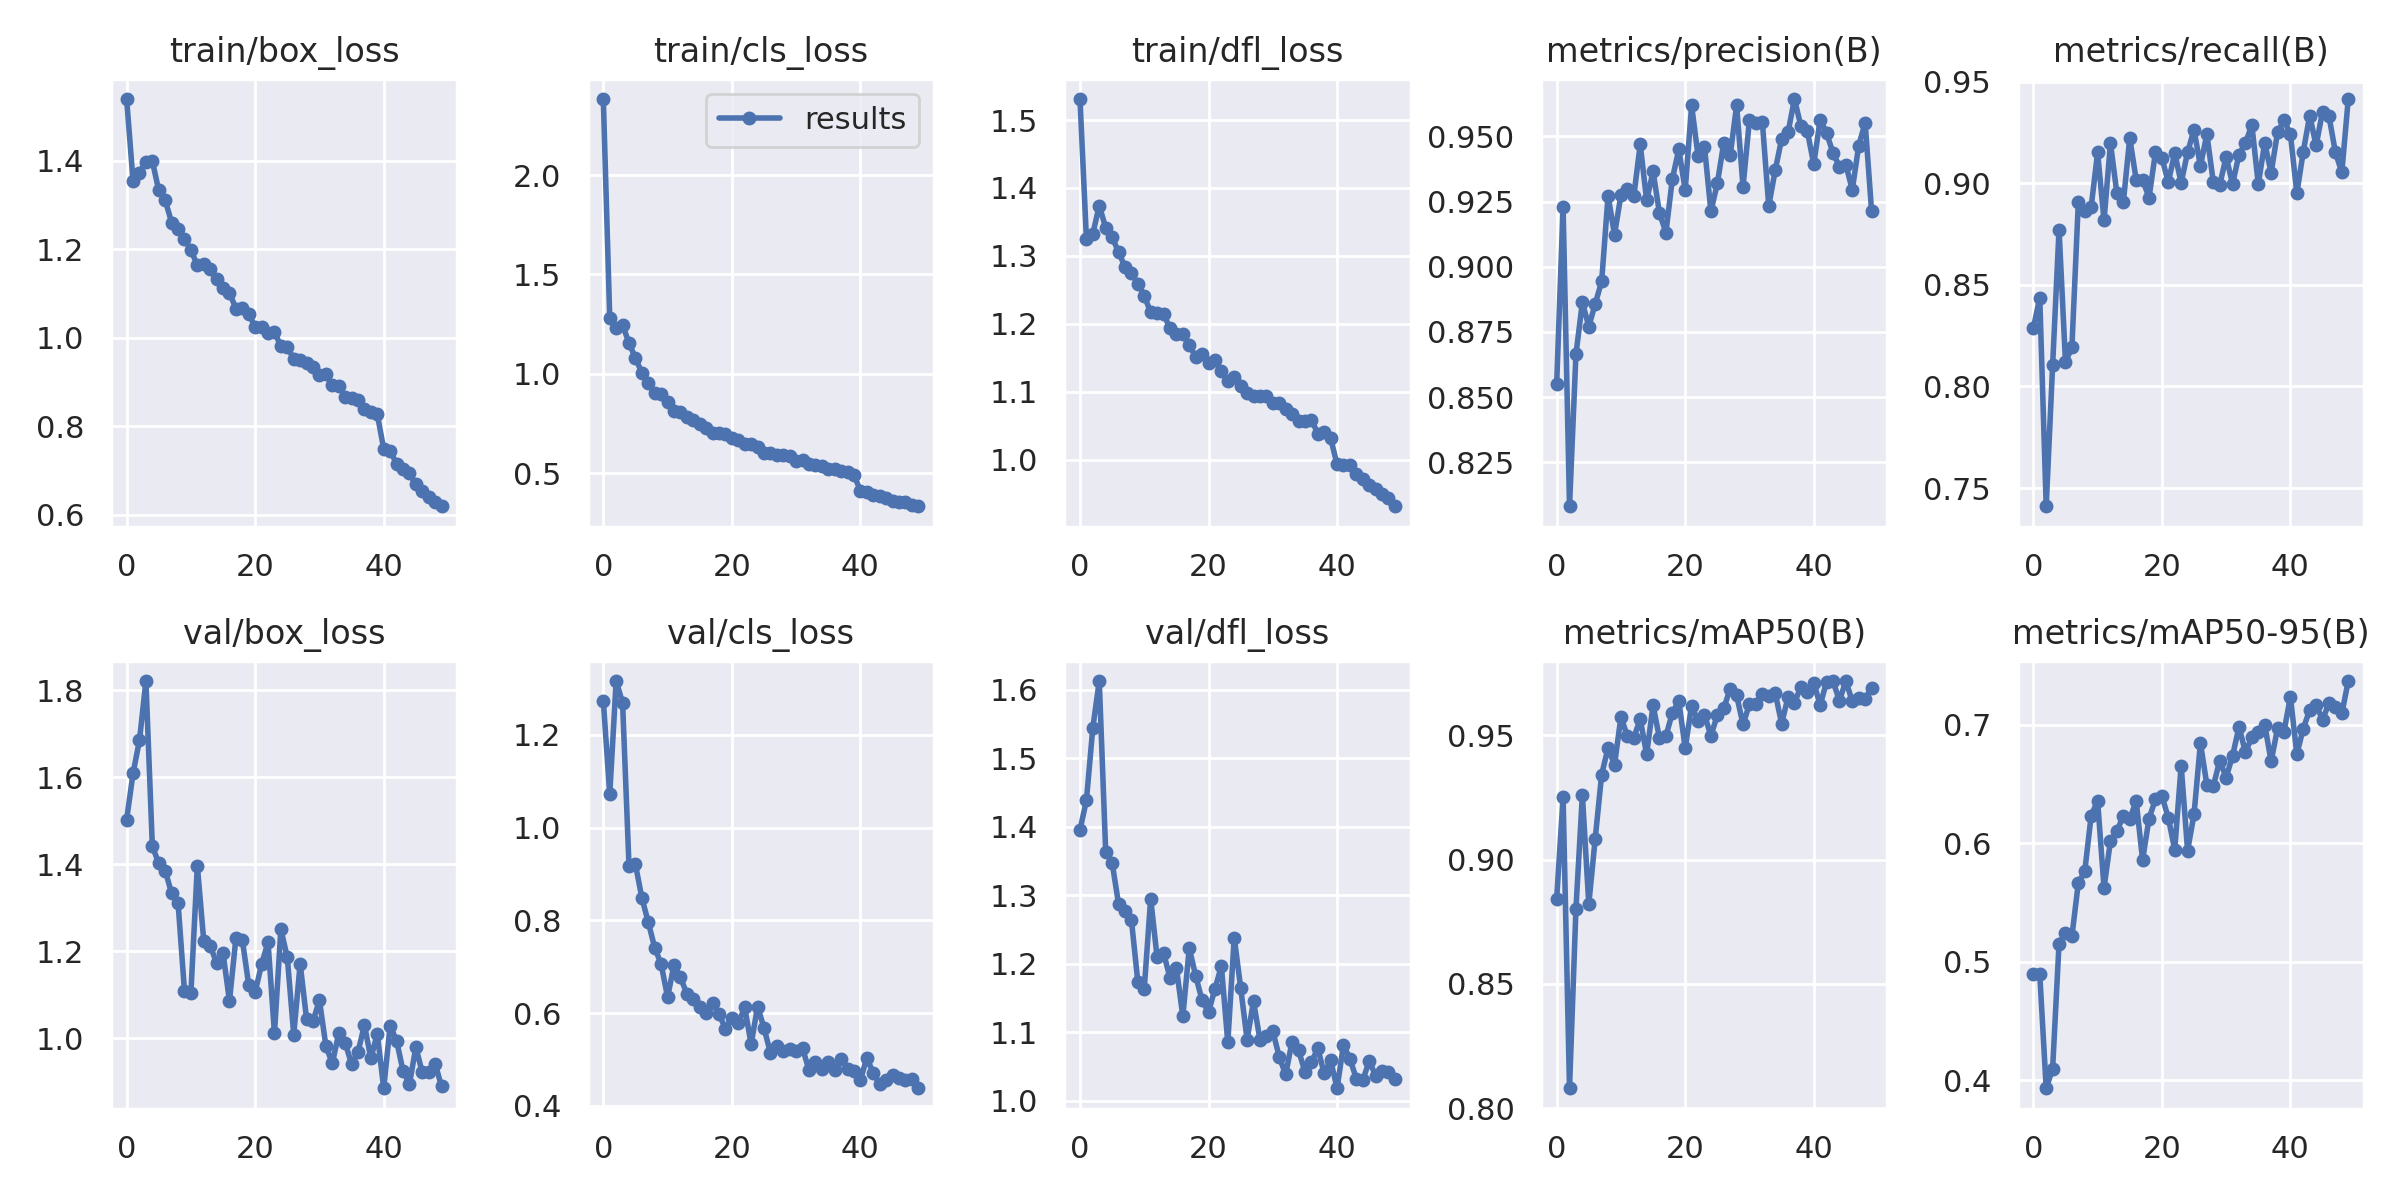

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


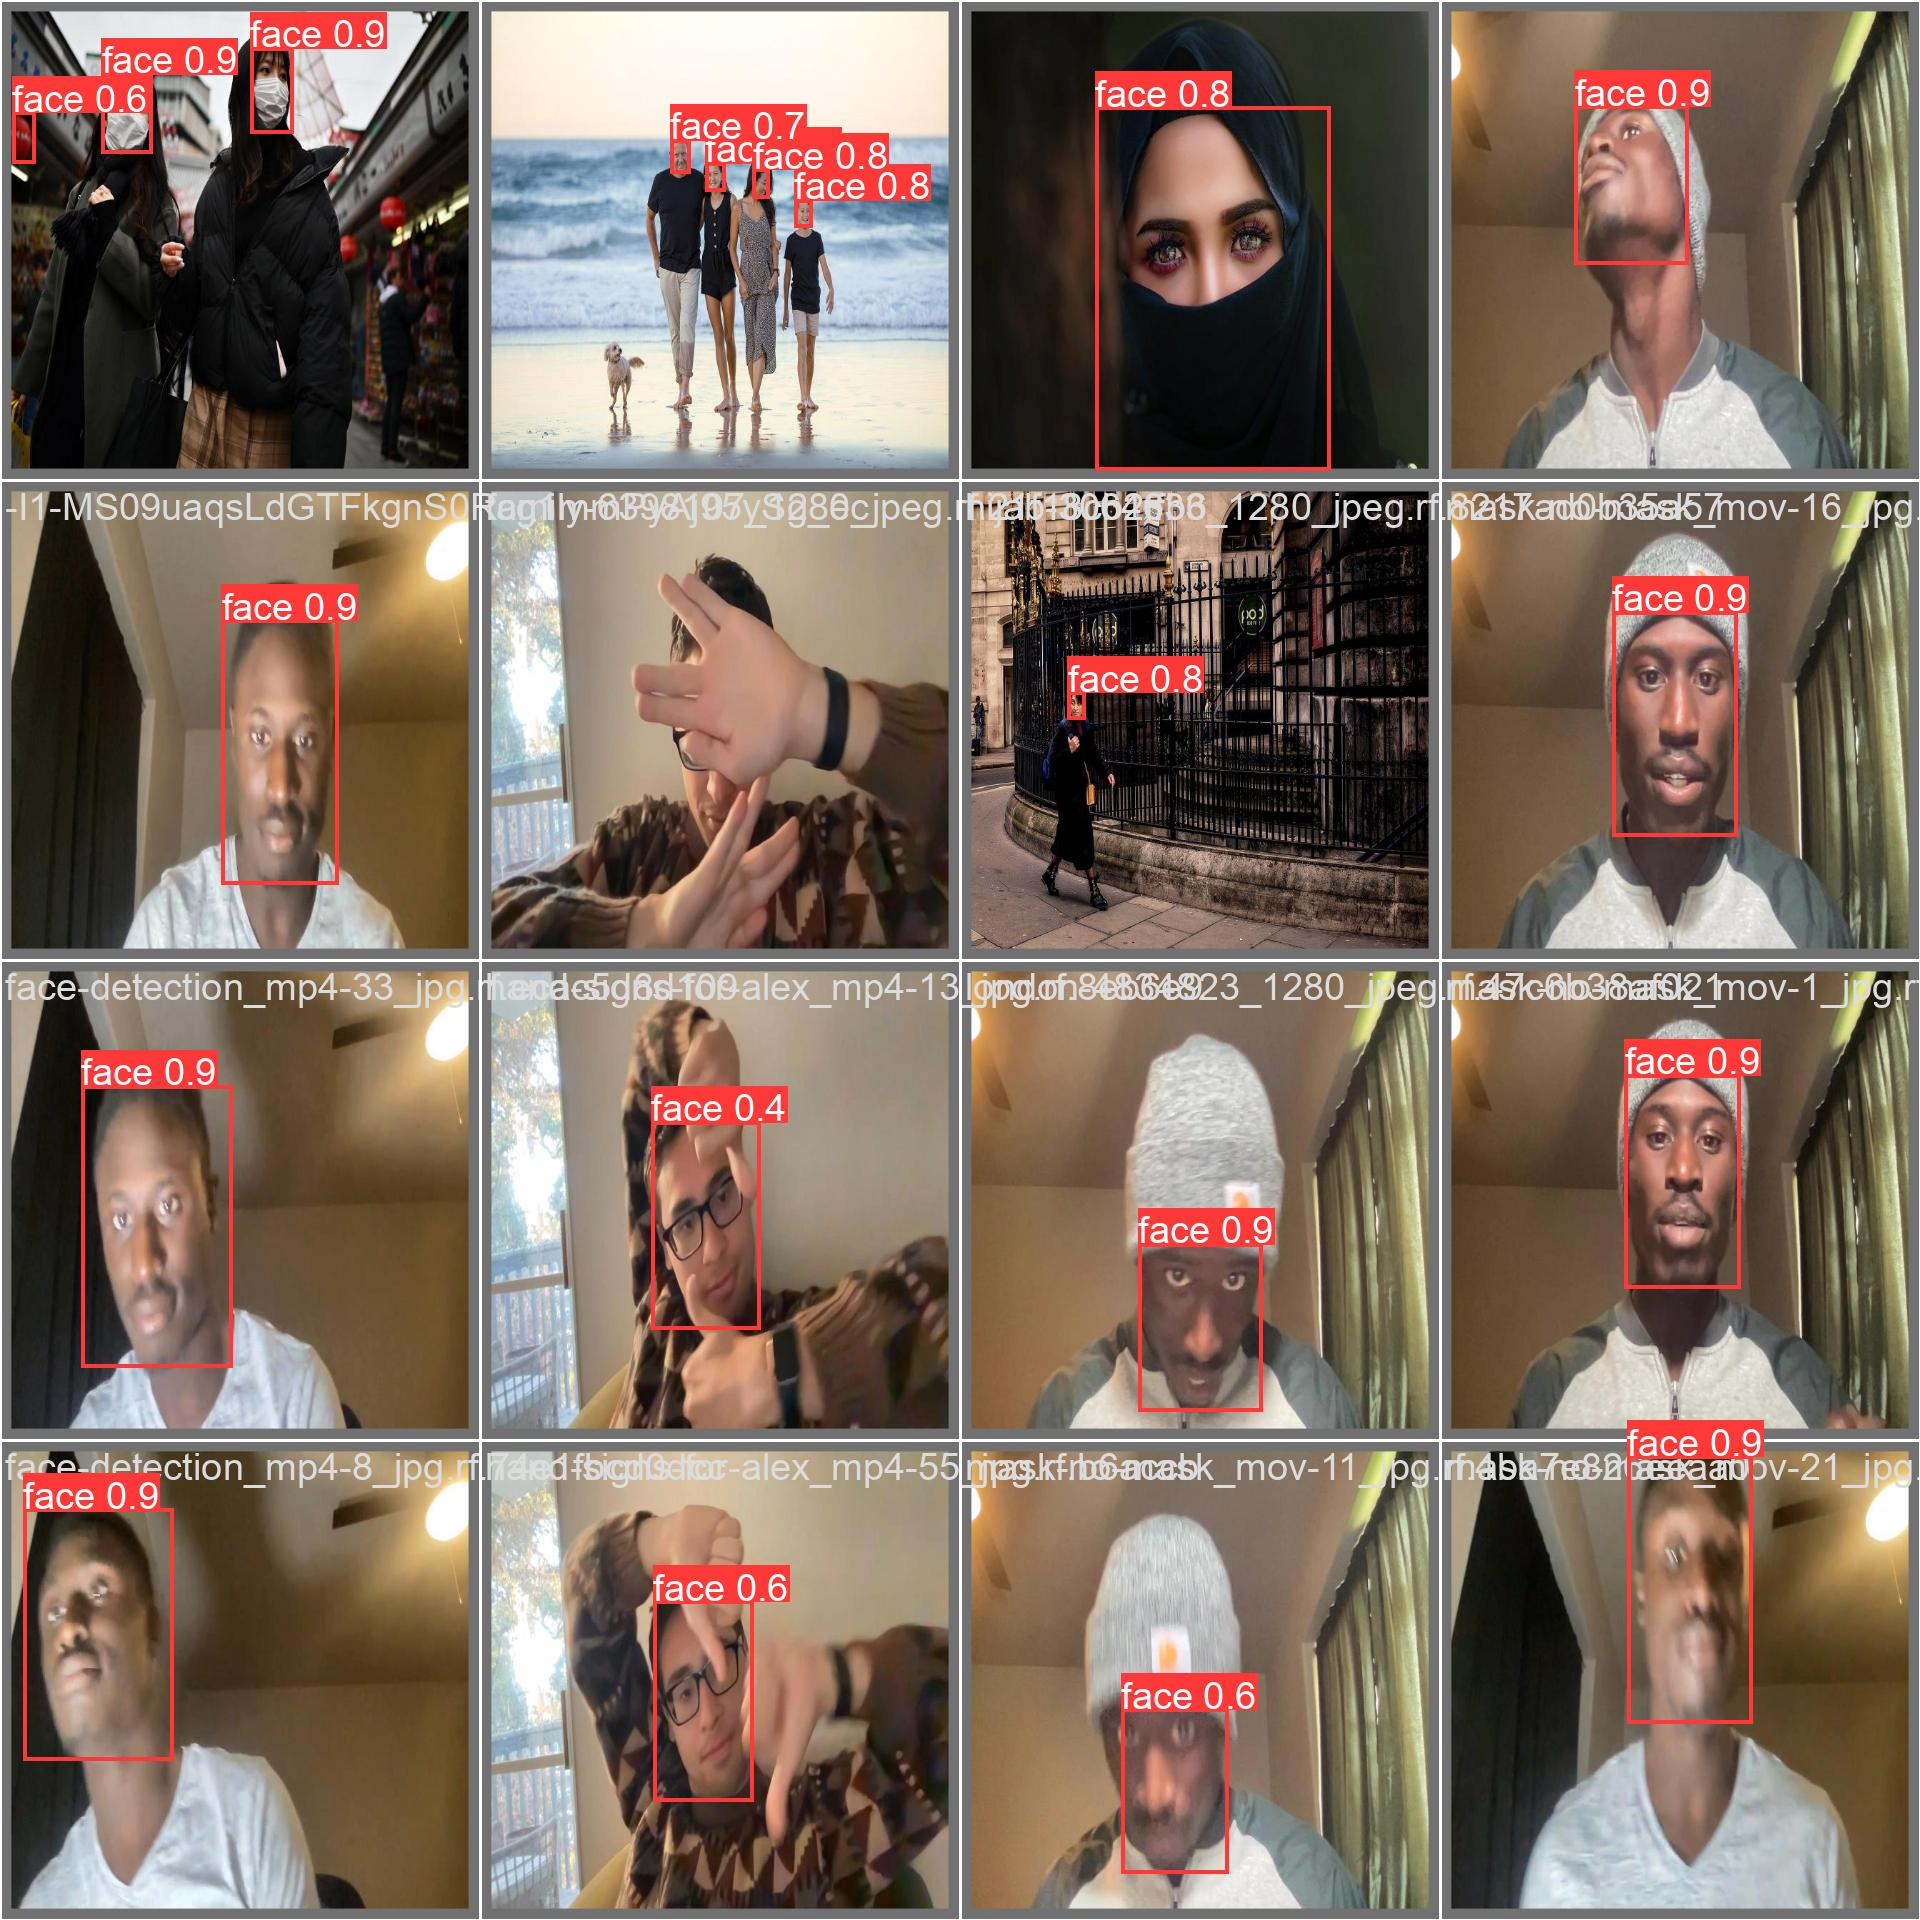

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
#Validate

%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

In [ ]:
#Predict

%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.45 source={dataset.location}/test/images save=True

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
#Deploy model
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train3/")

In [ ]:
model = YOLO("/content/best (1).pt")
model.export(format="onnx",opset=12)  # export the model to ONNX format

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from /content/best (1).pt with output shape (1, 5, 8400) (6.0 MB)
requirements: YOLOv8 requirement "onnx>=1.12.0" not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 65.9 MB/s eta 0:00:00

requirements: 1 package updated per ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.15.0...
ONNX: export success ✅ 9.8s, saved as /content/best (1).onnx (11.7 MB)

Export complete (22.0s)
Results saved to /content
Predict:         yolo task=detect mode=predict model=/content/best (1).onnx -WARNING ⚠️ not yet supported for YOLOv8 exported models
Validate:        yolo task=detect mode=val model=/content/best (1).onnx -WARNING ⚠️ not yet supported for YOLOv8 exported models
Visualize:       https://

In [ ]:
!pip show opencv-python-headless

In [ ]:
import cv2
import numpy as np

# Load Model
net = cv2.dnn.readNet('/content/runs/detect/train/weights/best.onnx')
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA_FP16)

INPUT_WIDTH = 640
INPUT_HEIGHT = 640
SCORE_THRESHOLD = 0.2
NMS_THRESHOLD = 0.4
CONFIDENCE_THRESHOLD = 0.4

# Define yolov8 classes
CLASESS_YOLO = [ 'person' ]

In [ ]:
from PIL import Image

# def predictNow(path):
path = "23.jpg"
image = cv2.imread(path)
blob = cv2.dnn.blobFromImage(image, 1/255.0, (INPUT_WIDTH, INPUT_HEIGHT), swapRB=True, crop=False)
net.setInput(blob)
preds = net.forward()
preds = preds.transpose((0, 2, 1))
class_ids, confs, boxes = list(), list(), list()
image_height, image_width, _ = image.shape
x_factor = image_width / INPUT_WIDTH
y_factor = image_height / INPUT_HEIGHT

rows = preds[0].shape[0]

for i in range(rows):
    row = preds[0][i]
    conf = row[4]

    classes_score = row[4:]
    _,_,_, max_idx = cv2.minMaxLoc(classes_score)
    class_id = max_idx[1]
    if (classes_score[class_id] > .25):
        confs.append(conf)
        label = CLASESS_YOLO[int(class_id)]
        class_ids.append(label)

        #extract boxes
        x, y, w, h = row[0].item(), row[1].item(), row[2].item(), row[3].item()
        left = int((x - 0.5 * w) * x_factor)
        top = int((y - 0.5 * h) * y_factor)
        width = int(w * x_factor)
        height = int(h * y_factor)
        box = np.array([left, top, width, height])
        boxes.append(box)

r_class_ids, r_confs, r_boxes = list(), list(), list()

indexes = cv2.dnn.NMSBoxes(boxes, confs, 0.5, 0.45)
for i in indexes:
    r_class_ids.append(class_ids[i])
    r_confs.append(confs[i])
    r_boxes.append(boxes[i])

for i in indexes:
  box = boxes[i]
  left = box[0]
  top = box[1]
  width = box[2]
  height = box[3]

  cv2.rectangle(image, (left, top), (left + width, top + height), (0,255,0), 3)
Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
import matplotlib.pyplot as plt

image = cv2.imread("19.jpg")

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
!python --version